In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import os
import seaborn as sns

In [2]:
data= pd.read_csv("data/ADNI_APOE_Collection.csv")

In [3]:
data.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,9/1/05,AD,9/12/05,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,11/8/05,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,9/2/05,CN,9/7/05,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,11/15/05,LMCI,11/29/05,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3",MCI
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,11/7/05,AD,11/10/05,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4",AD


In [4]:
data = data.dropna()
data.isnull().sum().sum()

0

### Variable Descriptions

* `directory.id` - Id assigned to imaging directories. Not from LONi data
* `Subject (PTID)` - Participant ID
* `RID` - Participant roster ID
* `Image.Data.ID` - MRI ID
* `Modality` - Image type
* `Visit` - 1 = screening scan
* `Acq.Date` - MRI date
* `DX.bl` - Diagnosis at baseline
* `EXAMDATE` - Examination Date
* `AGE` - Age at baseline
* `PTGENDER` - Sex
* `PTEDUCAT` - Years of Education
* `PTETHCAT` - Ethnicity
* `PTRACCAT` - Race
* `APOE4` - APOE4 genotype
* `MMSE` - MMSE score on cognitive test
* `imputed_genotype` - Challenge specific designation, TRUE = has imputed genotypes
* `APOE Genotype` - APOE allele 1 and allele 2 genotypes
* `Dx Codes for Submission` - The LMCI in the ADNI data is equivalent to MCI in test. This column just converts LMCI -> MCI


## Declaring Features (X) and Target(Y) columns

In [5]:
X= data
Y= data['DX.bl']
del data

In [6]:
#removing unnecessary columns
columns_to_remove= list(X.columns)[0:9]
columns_to_remove.append('Dx Codes for Submission')
print('Removing cloumns: ', columns_to_remove)

X = X.drop(columns_to_remove, axis=1)

Removing cloumns:  ['directory.id', 'Subject', 'RID', 'Image.Data.ID', 'Modality', 'Visit', 'Acq.Date', 'DX.bl', 'EXAMDATE', 'Dx Codes for Submission']


In [7]:
features= list(X.columns)
X.head()

,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype
0,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4"
1,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3"
2,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3"
3,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3"
4,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4"


In [8]:
Y.head()

0      AD
1    LMCI
2      CN
3    LMCI
4      AD
Name: DX.bl, dtype: object

### Relevance of Features in Alzheimer's Disease Research

- **AGE**: Age is the primary risk factor for Alzheimer’s, with risk increasing significantly after age 65.

- **PTGENDER (Sex)**: Gender influences Alzheimer’s risk, with women generally at higher risk than men, possibly due to hormonal and biological differences.

- **PTEDUCAT (Years of Education)**: Higher education levels are associated with a lower risk, likely due to cognitive reserve that may delay symptom onset.

- **PTETHCAT (Ethnicity)**: Ethnic background impacts genetic risk factors and social determinants, influencing Alzheimer’s prevalence and progression.

- **PTRACCAT (Race)**: Race, similar to ethnicity, can affect genetic risk and health disparities, influencing Alzheimer’s susceptibility and outcomes.

- **APOE4**: The presence of APOE ε4 alleles significantly increases Alzheimer’s risk, especially for late-onset cases. The values 0, 1, and 2 refer to the number of ε4 alleles an individual carries in their APOE gene.

- **MMSE (Mini-Mental State Examination Score)**: MMSE scores assess cognitive function, helping track Alzheimer’s progression and severity.

- **imputed_genotype**: Imputed genotypes expand genetic insights, potentially identifying additional risk alleles linked to Alzheimer’s.

- **APOE Genotype**: The specific APOE alleles (ε2, ε3, ε4) provide critical information on genetic risk, with ε4 being the most impactful in increasing susceptibility.


## Exploratory Data Analysis

In [9]:
numerical_vars = ['AGE', 'MMSE', 'PTEDUCAT']
categorical_vars = list(set(features) - set(numerical_vars))

print('Categorical variable distributions:\n')

for var in categorical_vars:
    print('\nDistribution of', var)
    
    print(X[var].value_counts())

Categorical variable distributions:


Distribution of PTGENDER
PTGENDER
Male      363
Female    264
Name: count, dtype: int64

Distribution of PTETHCAT
PTETHCAT
Not Hisp/Latino    616
Hisp/Latino          8
Unknown              3
Name: count, dtype: int64

Distribution of APOE Genotype
APOE Genotype
3,3    275
3,4    221
4,4     71
2,3     45
2,4     13
2,2      2
Name: count, dtype: int64

Distribution of PTRACCAT
PTRACCAT
White    583
Black     31
Asian     13
Name: count, dtype: int64

Distribution of imputed_genotype
imputed_genotype
True     466
False    161
Name: count, dtype: int64

Distribution of APOE4
APOE4
0    322
1    234
2     71
Name: count, dtype: int64


Numerical Var Distributions:



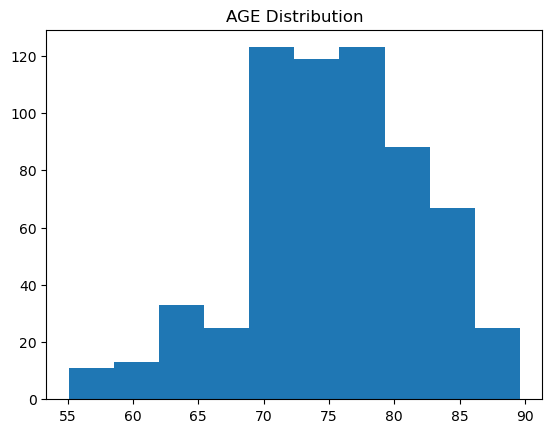

count    627.000000
mean      75.161882
std        6.689979
min       55.100000
25%       71.200000
50%       75.400000
75%       80.000000
max       89.600000
Name: AGE, dtype: float64


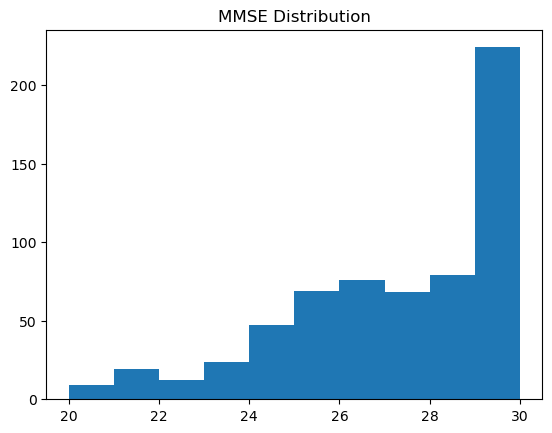

count    627.000000
mean      26.921850
std        2.563934
min       20.000000
25%       25.000000
50%       27.000000
75%       29.000000
max       30.000000
Name: MMSE, dtype: float64


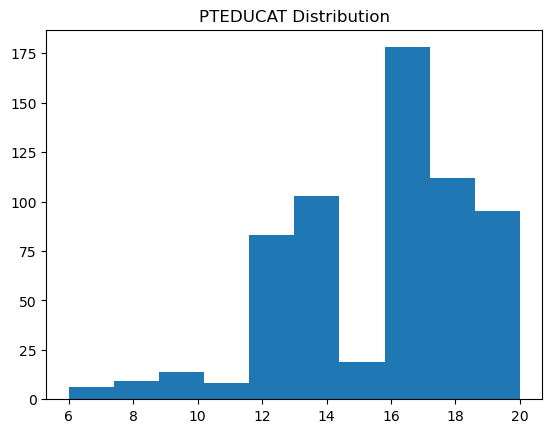

count    627.000000
mean      15.612440
std        2.978845
min        6.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       20.000000
Name: PTEDUCAT, dtype: float64


In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

print('Numerical Var Distributions:\n')

for var in numerical_vars:
    plt.hist(X[var], bins=10)
    plt.title(var + ' Distribution')
    plt.show()
    
    # descriptive stats
    print(X[var].describe())

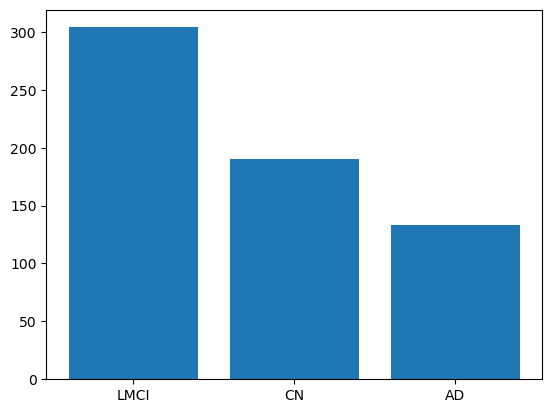

In [11]:
plt.bar(Y.value_counts().index, Y.value_counts())
plt.show()

High number (304) of limited impairment (LMCI). Maybe old age? Or the patients being evaluated are not random elderly patients but patients already known to have cognitive issues.

## Pre-processing

### Convert Categorical Variables to 1-Hot

In [12]:
for var in categorical_vars:
    print(f'Converting {var} to 1-hot encoding')
    one_hot_df = pd.get_dummies(X[var], prefix=var)
    X = pd.concat([X, one_hot_df], axis=1)
    X.drop(var, axis=1, inplace=True)
    
X.head(4)

Converting PTGENDER to 1-hot encoding
Converting PTETHCAT to 1-hot encoding
Converting APOE Genotype to 1-hot encoding
Converting PTRACCAT to 1-hot encoding
Converting imputed_genotype to 1-hot encoding
Converting APOE4 to 1-hot encoding


,AGE,PTEDUCAT,MMSE,PTGENDER_Female,PTGENDER_Male,PTETHCAT_Hisp/Latino,PTETHCAT_Not Hisp/Latino,PTETHCAT_Unknown,"APOE Genotype_2,2","APOE Genotype_2,3",...,"APOE Genotype_3,4","APOE Genotype_4,4",PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_White,imputed_genotype_False,imputed_genotype_True,APOE4_0,APOE4_1,APOE4_2
0,81.3,18,20,False,True,False,True,False,False,False,...,True,False,False,False,True,False,True,False,True,False
1,67.5,10,27,False,True,True,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
2,73.7,16,29,False,True,False,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
3,80.4,13,25,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False


### Normalization function for neural network

In [13]:
def normalize(X):
    X = np.array(X)
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    normalized_X = (X - means) / stds

    print('Normalizing:')
    for i, (mean, std) in enumerate(zip(means, stds)):
        print(f'  Variable {i+1}: Mean = {mean:.2f}, Standard Deviation = {std:.2f}')

    return normalized_X

### Splitting Train and Test Datasets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

print('X_train:', X_train.shape, '\ty_train:', y_train.shape)
print('X_test:', X_test.shape, '\ty_test:', y_test.shape)
num_test = X_test.shape[0]

X_train: (501, 22) 	y_train: (501,)
X_test: (126, 22) 	y_test: (126,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier

## Logistic Regression

Cross Validation: 68.48%
Accuracy: 74.60%
Precision: 74.84%
Recall: 74.60%
F1 Score: 74.61%
Confusion Matrix:


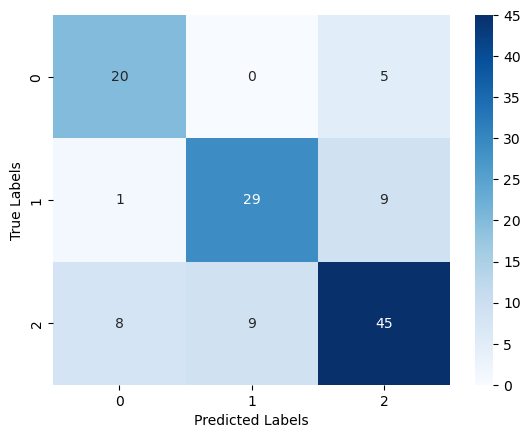

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
log_clf.fit(X_train, y_train)

y_pred = log_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(log_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Random Forest Classifier

Cross Validation: 65.29%
Accuracy: 66.67%
Precision: 67.59%
Recall: 66.67%
F1 Score: 66.36%
Confusion Matrix:


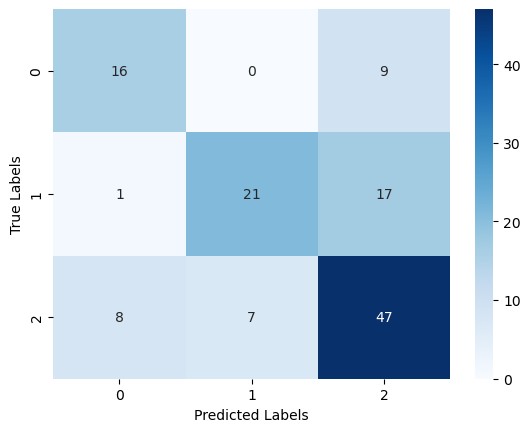

In [18]:
rf_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                criterion='gini', max_depth=None, max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0, min_samples_leaf=1,
                                min_samples_split=2, min_weight_fraction_leaf=0.0,
                                n_estimators=100, n_jobs=-1, oob_score=False,
                                random_state=123, verbose=0, warm_start=False)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(rf_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Ridge Classifier

Cross Validation: 63.09%
Accuracy: 71.43%
Precision: 72.00%
Recall: 71.43%
F1 Score: 71.25%
Confusion Matrix:


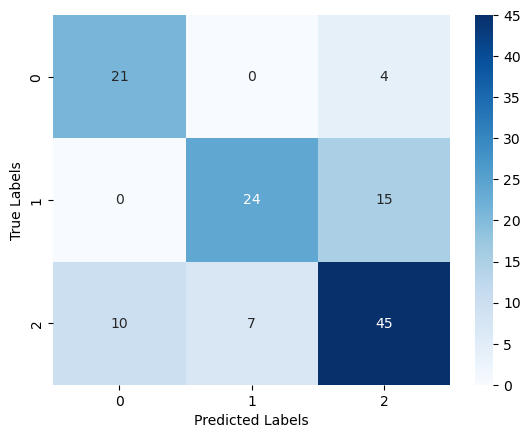

In [19]:
rg_clf = RidgeClassifier(alpha=1.0, copy_X=True, fit_intercept=True, random_state=123, solver='auto', tol=0.0001)
rg_clf.fit(X_train, y_train)

y_pred = rg_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(rg_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Gradient Boosting Classifier

Cross Validation: 63.89%
Accuracy: 67.46%
Precision: 67.86%
Recall: 67.46%
F1 Score: 67.42%
Confusion Matrix:


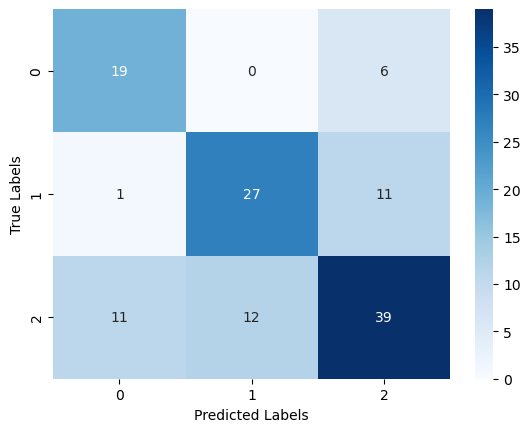

In [20]:
gb_clf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(gb_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Multi Layer Perceptron Classifier

Cross Validation: 45.88%
Accuracy: 67.46%
Precision: 70.25%
Recall: 67.46%
F1 Score: 65.99%
Confusion Matrix:


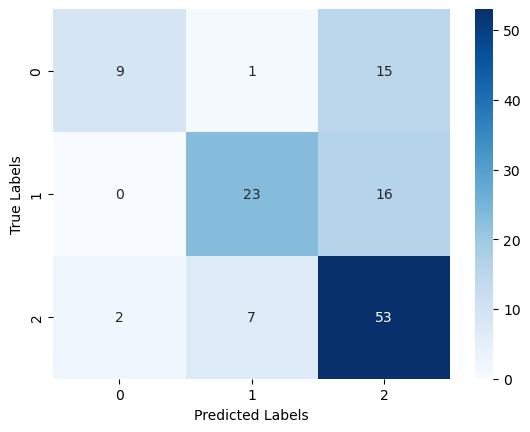

In [21]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(15, 10), alpha=3, learning_rate='adaptive', max_iter=100000)
mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)

print('Cross Validation:', format(cross_val_score(mlp_clf, X_train, y_train, cv=5).mean(), '.2%'))
print('Accuracy:', format(accuracy_score(y_test, y_pred), '.2%'))
print('Precision:', format(precision_score(y_test, y_pred, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, y_pred, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, y_pred, average='weighted'), '.2%'))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Model Selection

Choosing Logistic Regression with validation Score .68

In [22]:
##test logistic regression model

log_clf_preds = log_clf.predict(X_test)
    
log_clf_accuracy = (log_clf_preds == y_test)
print('Test Accuracy =', format( np.sum(log_clf_accuracy)/num_test, '.2%'))

Test Accuracy = 74.60%


In [23]:
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')
log_clf.fit(X_train, y_train)
log_clf_preds = log_clf.predict(X_test)

print('Logistic Regression:')
print('Accuracy:', format(accuracy_score(y_test, log_clf_preds), '.2%'))
print('Precision:', format(precision_score(y_test, log_clf_preds, average='weighted'), '.2%'))
print('Recall:', format(recall_score(y_test, log_clf_preds, average='weighted'), '.2%'))
print('F1 Score:', format(f1_score(y_test, log_clf_preds, average='weighted'), '.2%'))

Logistic Regression:
Accuracy: 74.60%
Precision: 74.84%
Recall: 74.60%
F1 Score: 74.61%


## Export model

In [24]:
import joblib
#joblib.dump(log_clf, 'model/alzheimer_model.pkl')